In [5]:
from readability import Readability
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
efcamdat_file_path = './../data/Final database (main prompts).xlsx'
df = pd.read_excel(efcamdat_file_path, sheet_name='Sheet 1')
efcamdat_df = df[['writing_id', 'cefr', 'cefr_numeric', 'level', 'grade', 'wordcount', 'mtld', 'text', 'text_corrected']]

In [ ]:
for index, row in efcamdat_df.iterrows():
    text = row['text']
    rd = Readability(text)
    efcamdat_df.at[index, 'flesch_reading_ease'] = rd.FleschReadingEase()
    efcamdat_df.at[index, 'flesch_kincaid_grade'] = rd.FleschKincaidGradeLevel()
    efcamdat_df.at[index, 'gunning_fog_index'] = rd.GunningFogIndex()
    efcamdat_df.at[index, 'coleman_liau_index'] = rd.ColemanLiauIndex()
    efcamdat_df.at[index, 'smog_index'] = rd.SMOGIndex()
    efcamdat_df.at[index, 'ARI'] = rd.ARI()
    efcamdat_df.at[index, 'lix'] = rd.LIX()
    efcamdat_df.at[index, 'rix'] = rd.RIX()

Text(0, 0.5, 'Number of texts')

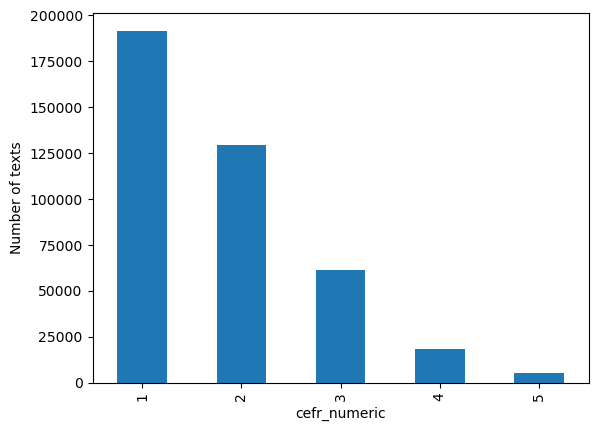

In [17]:
# group by cefr_numeric and calculate number of texts in each group and create a bar chart

efcamdat_df.groupby('cefr_numeric').count()['writing_id'].plot.bar().yaxis.set_label_text('Number of texts')


In [31]:
aa= efcamdat_df.groupby('cefr_numeric', as_index=False)[['flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].mean()

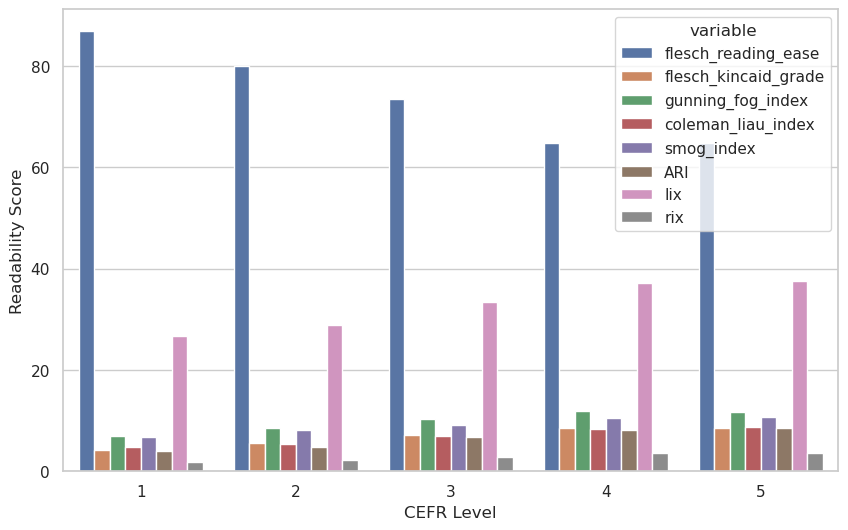

In [34]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x="cefr_numeric", y="value", hue="variable", data=pd.melt(aa, ['cefr_numeric']))
ax.set(xlabel='CEFR Level', ylabel='Readability Score')
plt.show()


In [20]:
efcamdat_df[['flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].describe()

,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,coleman_liau_index,smog_index,ARI,lix,rix
count,406062.000000,406062.000000,406062.000000,406062.000000,406062.000000,406062.000000,406062.000000,406062.000000
mean,81.394526,5.281454,8.316288,5.489563,7.807533,4.927208,29.008181,2.243063
std,20.530964,5.167646,5.288650,3.727113,2.986923,6.609371,14.628704,2.663712
min,-1206.210000,-8.302700,0.725000,-29.743600,3.000000,-6.881855,2.416667,0.000000
25%,72.298900,2.285200,5.081500,3.235700,6.038218,1.065616,20.138889,0.888889
50%,84.095700,4.084000,7.002900,5.139000,7.472136,3.133548,25.809524,1.500000
75%,93.985300,6.780000,10.000000,7.347500,9.210590,6.480000,33.727273,2.500000
max,164.303100,182.246700,97.248500,331.526700,38.916570,265.810000,250.913420,64.000000


In [35]:
efcamdat_df[['cefr_numeric', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].corr(method='pearson')

,cefr_numeric,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,coleman_liau_index,smog_index,ARI,lix,rix
cefr_numeric,1.000000,-0.306809,0.255606,0.272901,0.277446,0.379417,0.188288,0.206838,0.173731
flesch_reading_ease,-0.306809,1.000000,-0.903843,-0.788764,-0.788124,-0.801554,-0.805428,-0.820256,-0.774083
flesch_kincaid_grade,0.255606,-0.903843,1.000000,0.949839,0.683778,0.803012,0.961737,0.937319,0.883735
gunning_fog_index,0.272901,-0.788764,0.949839,1.000000,0.594183,0.859083,0.936392,0.922134,0.858255
coleman_liau_index,0.277446,-0.788124,0.683778,0.594183,1.000000,0.631187,0.717383,0.718886,0.647102
smog_index,0.379417,-0.801554,0.803012,0.859083,0.631187,1.000000,0.729909,0.772347,0.747429
ARI,0.188288,-0.805428,0.961737,0.936392,0.717383,0.729909,1.000000,0.952371,0.893990
lix,0.206838,-0.820256,0.937319,0.922134,0.718886,0.772347,0.952371,1.000000,0.927512
rix,0.173731,-0.774083,0.883735,0.858255,0.647102,0.747429,0.893990,0.927512,1.000000


In [38]:
efcamdat_df.groupby('cefr_numeric')[['cefr_numeric', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].corr(method='pearson')

cefr_numeric  flesch_reading_ease  \
cefr_numeric                                                           
1            cefr_numeric                   NaN                  NaN   
             flesch_reading_ease            NaN             1.000000   
             flesch_kincaid_grade           NaN            -0.874220   
             gunning_fog_index              NaN            -0.645933   
             coleman_liau_index             NaN            -0.771633   
             smog_index                     NaN            -0.674751   
             ARI                            NaN            -0.719270   
             lix                            NaN            -0.707094   
             rix                            NaN            -0.676071   
2            cefr_numeric                   NaN                  NaN   
             flesch_reading_ease            NaN             1.000000   
             flesch_kincaid_grade           NaN            -0.932184   
             gunning_fog_index              NaN            -0.877127   
             coleman_liau_index             NaN            -0.781092   
             smog_index                     NaN            -0.862528   
             ARI                            NaN            -0.880712   
             lix                            NaN            -0.913805   
             rix                            NaN            -0.866705   
3            cefr_numeric                   NaN                  NaN   
             flesch_reading_ease            NaN             1.000000   
             flesch_kincaid_grade           NaN            -0.911637   
             gunning_fog_index              NaN            -0.875317   
             coleman_liau_index             NaN            -0.820638   
             smog_index                     NaN            -0.891143   
             ARI                            NaN            -0.859851   
             lix                            NaN            -0.904615   
             rix                            NaN            -0.847201   
4            cefr_numeric                   NaN                  NaN   
             flesch_reading_ease            NaN             1.000000   
             flesch_kincaid_grade           NaN            -0.932020   
             gunning_fog_index              NaN            -0.908866   
             coleman_liau_index             NaN            -0.747320   
             smog_index                     NaN            -0.908237   
             ARI                            NaN            -0.904153   
             lix                            NaN            -0.920025   
             rix                            NaN            -0.871425   
5            cefr_numeric                   NaN                  NaN   
             flesch_reading_ease            NaN             1.000000   
             flesch_kincaid_grade           NaN            -0.913712   
             gunning_fog_index              NaN            -0.884699   
             coleman_liau_index             NaN            -0.767952   
             smog_index                     NaN            -0.896536   
             ARI                            NaN            -0.869745   
             lix                            NaN            -0.898917   
             rix                            NaN            -0.864512   

                                   flesch_kincaid_grade  gunning_fog_index  \
cefr_numeric                                                                 
1            cefr_numeric                           NaN                NaN   
             flesch_reading_ease              -0.874220          -0.645933   
             flesch_kincaid_grade              1.000000           0.903708   
             gunning_fog_index                 0.903708           1.000000   
             coleman_liau_index                0.733013           0.594960   
             smog_index                        0.711336           0.787816   
             ARI          

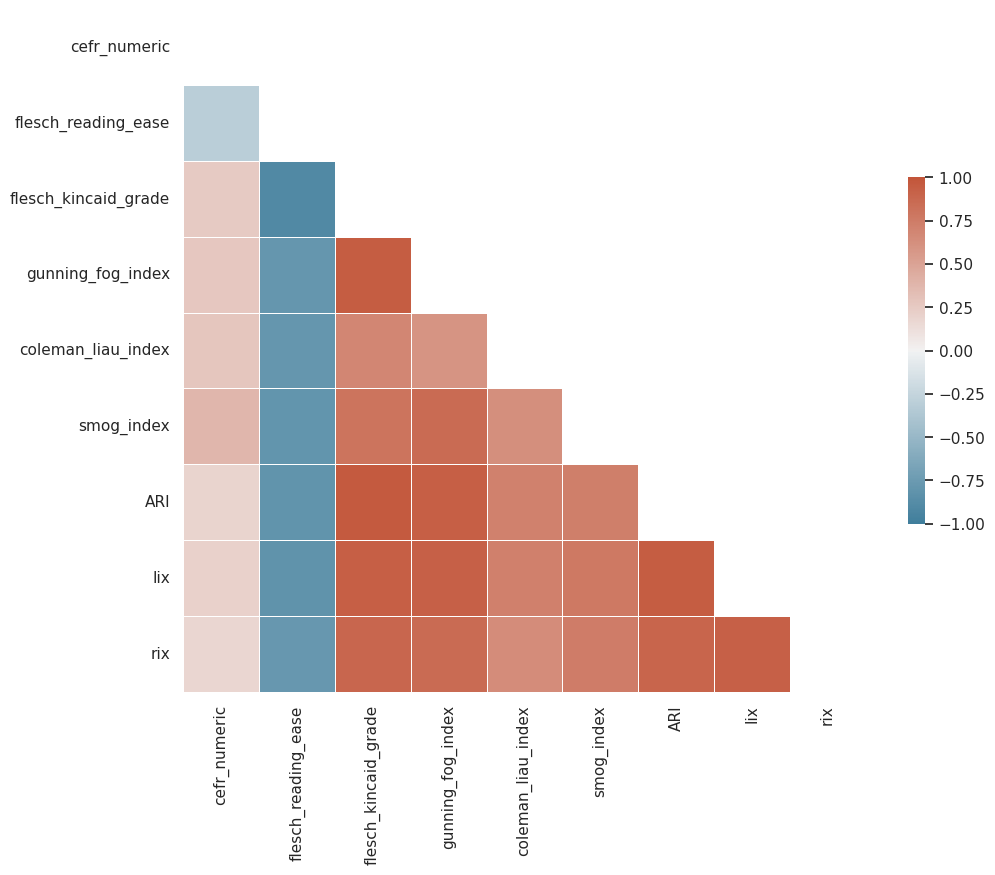

In [40]:
corr = efcamdat_df[['cefr_numeric', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].corr(method='pearson')

sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

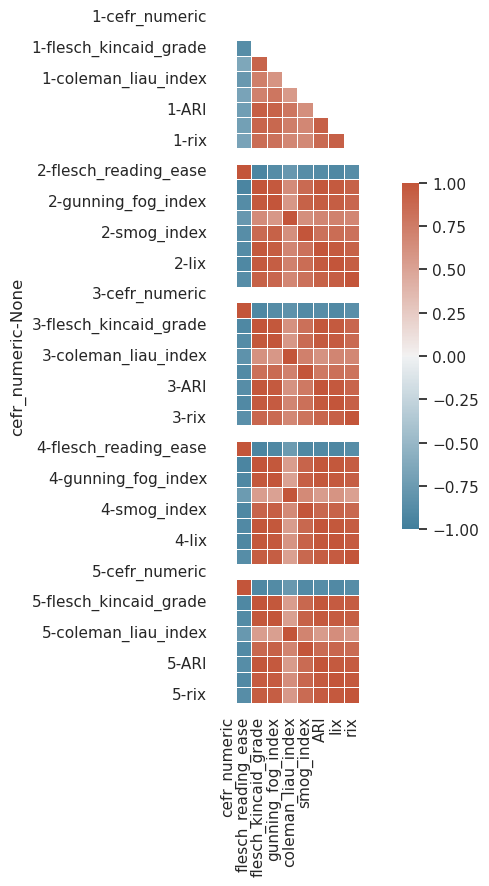

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = efcamdat_df.groupby('cefr_numeric')[['cefr_numeric', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 'coleman_liau_index', 'smog_index', 'ARI', 'lix', 'rix']].corr(method='pearson')

sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
